# Trabajo 1: Introducción a las redes neuronales con TensorFlow y Keras

En este primer trabajo, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.



El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

** Pregunta 1.1 *(0.5 puntos)* ** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:

### Tu código aquí ###
print(x_train.shape)
### ¿Cuántas imágenes hay de *training y de test? ###
print(x_train.shape[0],'training samples')
print(x_test.shape[0],"test samples")
### ¿Qué tamaño tienen las imágenes? ###
print(x_train.shape[1],'x',x_train.shape[2],' puntos')
print (type(x_train[99][3][15])) #pixel posición (3,15) de la imagen 100 es un número real

(60000, 28, 28)
60000 training samples
10000 test samples
28 x 28  puntos
<class 'numpy.float64'>


*Tu respuesta aquí*

**Pregunta 1.2 *(0.5 puntos)* ** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:

### Tu código aquí ###
print(x_train[7][0:3]) # muestra solo las tres primeras filas de la imagen
# describir qué contiene la información en y
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[7]])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]]
Pullover


*Tu respuesta aquí*

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

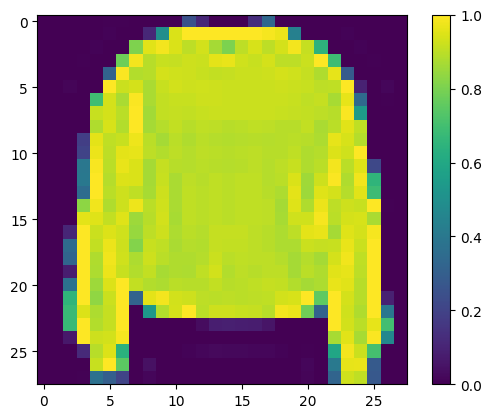

In [ ]:
visualize_example(x_train[7])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
### Tu código aquí ###
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='sigmoid'),
keras.layers.Dense(64, activation='sigmoid'),
keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9786 - accuracy: 0.4415 - val_loss: 1.5618 - val_accuracy: 0.5799
Epo

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1 punto)* **. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
### Tu código aquí ###
score=model.evaluate(x_test,y_test,verbose=1)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.8253
Test loss: 0.49268245697021484
Test accuracy: 0.8252999782562256


**Pregunta 3.2 *(1 punto)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

313/313 [==============================] - 1s 2ms/step


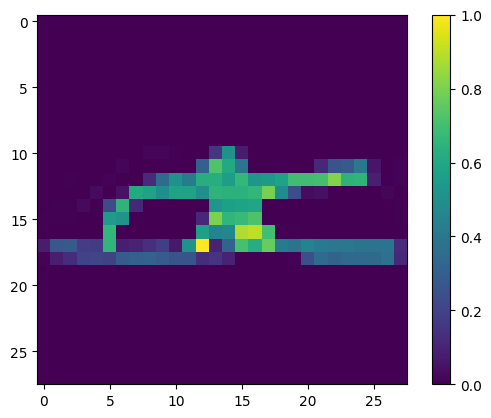

Sandal


array([0.00430814, 0.00400396, 0.00232956, 0.01276255, 0.00100344,
       0.81163895, 0.00195247, 0.15334235, 0.00483807, 0.0038205 ],
      dtype=float32)

In [ ]:
### Tu código aquí ###
import numpy as np
predictions=model.predict(x_test)
np.argmax(predictions[0])
visualize_example(x_test[52])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[np.argmax(predictions[52])])
predictions[52]

*Tu respuesta aquí*